In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data = df[df.columns[:-1]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826


In [7]:
data['MEDV'] = boston_dataset.target

In [8]:
X = data.drop('MEDV', axis=1).to_numpy()
Y = data['MEDV'].to_numpy()

In [9]:
#поделить датасет 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=21)

In [10]:
import torch
from torch import nn
from torch import functional as F

In [11]:
#конвертируйте в torch tensor 
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [12]:
y_train.shape

torch.Size([404])

In [13]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x).reshape(-1)
        return out

In [14]:
#подберите параметры 
inputDim = 12
outputDim = 1
learningRate = 0.01
epochs = 1000

model = linearRegression(inputDim, outputDim)

In [15]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [16]:
error = []

In [17]:
X_train.shape

torch.Size([404, 12])

In [18]:
#обучите нейронную сеть
for epoch in range(epochs):

    #epoch += 1

    inputs, labels = X_train, y_train
     
    optimizer.zero_grad()
    outputs = model(inputs)

    
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if (epoch%20 == 0):
        print('epoch ',epoch,' loss: ', loss.item())
        error.append(loss)

epoch  0  loss:  594.8081665039062
epoch  20  loss:  270.9816589355469
epoch  40  loss:  136.36801147460938
epoch  60  loss:  76.66474151611328
epoch  80  loss:  49.883174896240234
epoch  100  loss:  37.73372268676758
epoch  120  loss:  32.13931655883789
epoch  140  loss:  29.50504493713379
epoch  160  loss:  28.220422744750977
epoch  180  loss:  27.559383392333984
epoch  200  loss:  27.192346572875977
epoch  220  loss:  26.968381881713867
epoch  240  loss:  26.817476272583008
epoch  260  loss:  26.706518173217773
epoch  280  loss:  26.619375228881836
epoch  300  loss:  26.547809600830078
epoch  320  loss:  26.487356185913086
epoch  340  loss:  26.435380935668945
epoch  360  loss:  26.390178680419922
epoch  380  loss:  26.350576400756836
epoch  400  loss:  26.315685272216797
epoch  420  loss:  26.284812927246094
epoch  440  loss:  26.25739860534668
epoch  460  loss:  26.232973098754883
epoch  480  loss:  26.211153030395508
epoch  500  loss:  26.19159507751465
epoch  520  loss:  26.1740

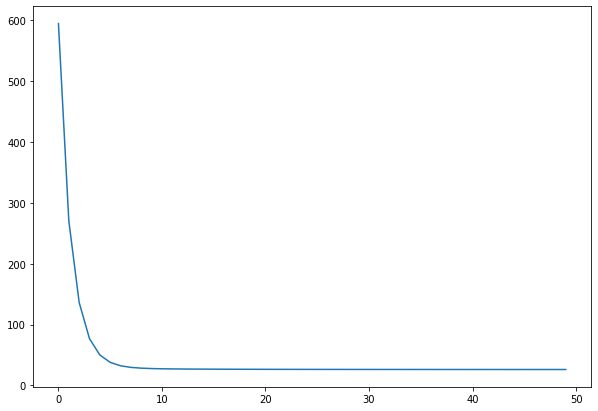

In [19]:
#график ошибки
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(error)), error)
plt.show()

In [20]:
#model.eval()
with torch.no_grad(): 
    predicted = model(X_test)

In [21]:
predicted

tensor([15.7404, 20.0549, 24.3934, 37.1628, 31.6379, 14.2927, 24.9260, 29.0371,
        31.5565, 17.7850, 22.2901, 17.1829, 28.3954, 13.5491, 18.7236, 27.2074,
        15.7862, 28.0359, 11.1862, 19.7141, 22.6063, 26.1692, 20.7010,  5.1628,
        18.6871, 35.1271, 25.7569, 31.8351, 14.4221, 25.1049, 25.7126, 17.8945,
        34.3154, 12.9594, 27.2862, 31.7326, 36.7259, 24.1806, 19.0424, 18.1666,
        20.6477, 29.4264, 25.0219, 21.0481, 20.0835, 19.6772, 29.2699, 20.7126,
        30.3851, 23.8271, 32.9722, 14.8488, 41.7093, 15.7404, 15.6725, 17.7230,
        11.5389, 22.1739, 22.0260, 26.5648, 18.4446, 34.8428, 25.3306, 22.4319,
        36.1359, 36.9951, 30.2139, 20.8594, 22.0343, 17.1750, 15.6876, 23.5556,
         5.9444, 26.3182, 27.3061, 22.9629, 33.2965, 20.0975, 22.9549, 16.7395,
        21.5470, 21.7050, 27.3338, 17.9056, 11.5317, 24.6365, 35.4320, 26.4159,
        15.8883, 23.8293, 21.7067, 10.8344, 41.6917, 12.0945, 30.5504, 12.8674,
         9.7173, 19.7345, 18.0483, 30.48

In [22]:
y_test

tensor([14.1000, 13.4000, 22.1000, 41.7000, 28.5000, 13.6000, 23.1000, 23.0000,
        31.6000, 16.0000, 18.9000,  8.5000, 23.3000,  7.2000, 18.4000, 25.0000,
        13.4000, 23.6000, 14.4000, 17.8000, 18.7000, 19.4000, 15.2000, 17.9000,
        23.1000, 39.8000, 28.1000, 37.0000, 20.6000, 21.4000, 24.2000, 19.9000,
        32.0000, 13.9000, 36.2000, 32.9000, 46.7000, 21.7000, 16.1000, 14.9000,
        22.2000, 41.3000, 22.2000, 50.0000, 22.2000, 13.8000, 24.1000, 20.1000,
        30.5000, 21.2000, 34.9000, 16.2000, 50.0000, 13.8000, 11.3000,  6.3000,
         7.0000, 21.0000, 19.3000, 27.1000, 13.0000, 33.4000, 24.7000, 20.9000,
        50.0000, 33.3000, 22.0000, 18.9000, 21.0000, 20.4000,  5.6000, 23.8000,
        15.0000, 22.0000, 22.8000, 20.5000, 27.5000, 17.7000, 22.7000, 15.4000,
        19.3000, 17.1000, 23.7000, 15.2000, 10.4000, 21.7000, 36.5000, 23.9000,
        17.4000, 24.8000, 13.9000,  8.7000, 48.8000,  8.3000, 29.9000, 18.2000,
        10.9000, 19.1000, 19.1000, 26.40

In [25]:
#RMSE / MSE на Train/test сетах
import sklearn.metrics as metrics 

In [26]:
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MSE: 30.267776
RMSE: 5.501616
